# 1 Введение

## 1.1 Постановка задачи

**Заказчик** -- нефтедобывающая компания  
  
**Задача** -- определить регион, где необходимо бурить следующую скважину. Для этого необходимо построить модель для определения региона, где добыча принесёт наибольшую прибыль

## 1.2 Исходные данные

### 1.2.1 Общее описание
Нам предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионах уже известны
> **Примечание**  
>  
>Шаги для выбора локации обычно такие:
>- в избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
>- строят модель для предсказания объёма запасов в новых скважинах;
>- выбирают скважины с самыми высокими оценками значений;
>- определяют регион с максимальной суммарной прибылью отобранных скважин.  
  
**Условия задачи**:
- для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые);
- при разведке региона исследуют 500 точек, из которых выбирают 200 лучших для расчёта прибыли;
- бюджет на разработку скважин в регионе — 10 млрд рублей;
- один баррель сырья приносит 450 рублей дохода; доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей;
- после оценки рисков необходимо оставить лишь те регионы, в которых вероятность убытков меньше 2.5%; среди них выбирают регион с наибольшей средней прибылью;
- данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### 1.2.2 Переданные файлы
- geo_data_0.csv
- geo_data_1.csv
- geo_data_2.csv

### 1.2.3 Описание данных
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака скважин (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

## 1.3 План обработки и анализа данных

### 1.3.1 Предобработка данных
- обзор данных;
- обнаружение и удаление пропусков:
 - выявить пропуски;
 - проанализировать причины их появления;
 - заполнить пропуски (приняв решение по алгоритму заполнения), либо удалить их;
- преобразование типов данных столбцов (при необходимости);
- удаление дубликатов строк.  
  
### 1.3.2 Анализ данных
- оценка распределения значений признаков;
- проверка признаков на мультиколлинеарность -- наличие сильной взаимосвязи между какими-то признаками.  

### 1.3.3 Обучение и проверка моделей для каждого региона
### 1.3.4 Расчёт прибыли
### 1.3.5 Расчёт рисков для каждого региона
### 1.3.6 Вывод

## 1.4 Пользовательские функции

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from scipy import stats as st

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 6
#pd.options.display.max_columns = 50

In [2]:
def hists_plot(data, plot_title='', bins=50, figsize=(16, 10), m_row=2, m_col=2):
    '''
    Функция отрисовки матрицы гистограмм с линией распределения плотности вероятности
    '''
    
    columns = data.columns
    data_col = 0
    
    fig, axs = plt.subplots(m_row, m_col, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")
    
    for row in range(m_row):
        for col in range(m_col):
            axs[row][col].set_title(plot_title + columns[data_col])
            sns.distplot(data[columns[data_col]], ax=axs[row][col], bins=bins, axlabel=columns[data_col])
            data_col += 1

In [3]:
def regplots_f(data):
    '''
    Функция отрисовки линий регрессии для независимых параметров
    '''
    
    fig, axs = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.regplot(data=data, x='f0', y='f1', ax=axs[0])
    axs[0].set_title('Взаимосвязь признаков f0, f1')
    axs[0].set_xlabel('f0')
    axs[0].set_ylabel('f1')
    
    sns.regplot(data=data, x='f0', y='f2', ax=axs[1])
    axs[1].set_title('Взаимосвязь признаков f0, f2')
    axs[1].set_xlabel('f0')
    axs[1].set_ylabel('f2')
    
    sns.regplot(data=data, x='f1', y='f2', ax=axs[2])
    axs[2].set_title('Взаимосвязь признаков f1, f2')
    axs[2].set_xlabel('f1')
    axs[2].set_ylabel('f2')

In [4]:
def regplots_t(data):
    '''
    Функция отрисовки линий регрессии для зависимого и независимых параметров
    '''
    
    fig, axs = plt.subplots(1, 3, figsize=(16,5), constrained_layout=True)
    sns.set(style="whitegrid")
    
    sns.regplot(data=data, x='f0', y='product', ax=axs[0])
    axs[0].set_title('Взаимосвязь признаков f0, product')
    axs[0].set_xlabel('f0')
    axs[0].set_ylabel('product')
    
    sns.regplot(data=data, x='f1', y='product', ax=axs[1])
    axs[1].set_title('Взаимосвязь признаков f1, product')
    axs[1].set_xlabel('f1')
    axs[1].set_ylabel('product')
    
    sns.regplot(data=data, x='f2', y='product', ax=axs[2])
    axs[2].set_title('Взаимосвязь признаков f2, product')
    axs[2].set_xlabel('f2')
    axs[2].set_ylabel('product')

In [5]:
fts = {0: {'f_train': None, 'f_test': None, 't_train': None, 't_test':None},
       1: {'f_train': None, 'f_test': None, 't_train': None, 't_test':None},
       2: {'f_train': None, 'f_test': None, 't_train': None, 't_test':None}}

models = {0: {'model': None, 'predict': None},
          1: {'model': None, 'predict': None},
          2: {'model': None, 'predict': None}}
    
def model_create(data, loc=0):
    '''
    Функция подготовки выборок, создание и обучения моделей, рассчет RMSE и расчётных запасов нефти
    '''
    
    features = data.drop('product', axis=1)
    target = data['product']

    fts[loc]['f_train'], fts[loc]['f_test'], fts[loc]['t_train'], fts[loc]['t_test'] = train_test_split(features, target,
                                                                                                        test_size=0.25,
                                                                                                        random_state=1457)
    models[loc]['model'] = LinearRegression()
    models[loc]['model'].fit(fts[loc]['f_train'], fts[loc]['t_train'])
    models[loc]['predict'] = pd.Series(data=models[loc]['model'].predict(fts[loc]['f_test']), index=fts[loc]['f_test'].index)
    rmse = mean_squared_error(fts[loc]['t_test'], models[loc]['predict']) ** 0.5
    
    print('RMSE модели: {:.2f} ({:.2%} от диапазона тестового целевого признака), средний предсказанный запас нефти: {:.2f}'
          .format(rmse, rmse / (fts[loc]['t_test'].max() - fts[loc]['t_test'].min()), models[loc]['predict'].mean()))

In [6]:
def bep_hists(data, bep, bins=100, figsize=(16,5)):
    '''
    Функция отрисовки гистограмм с линией распределения плотности вероятности для предикторных значений моделей
    '''
    
    fig, axs = plt.subplots(1, 3, figsize=figsize, constrained_layout=True)
    sns.set(style="whitegrid")
    
    location = 0
    
    for i in data:
        sns.distplot(i, ax=axs[location], bins=bins, axlabel='Прогнозируемый запас скважин')        
        ax2 = axs[location].twinx()
        sns.boxplot(x=i, ax=ax2)
        ax2.set(ylim=(-.5, 10))
        if bep:
            plt.axvline(bep, color='green', linestyle='dashed', linewidth=2)
            
        axs[location].set_title('Локация geo_' + str(location))
        location += 1

In [7]:
def revenue(source, predict, count, profit):
    '''
    Функция расчёта прибыли
    '''
    
    return source[predict.sort_values(ascending=False).index][:count].sum() * profit

In [8]:
def model_bootstrap(location, budget, unit_profit, bootstrap_size=1000, research_volume=500, revenue_volume=200):
    
    state = np.random.RandomState(1457)
    
    profits = []
    predicts = models[location]['predict']
    sources = fts[location]['t_test']
    
    for i in range(bootstrap_size):
        
        subsample = predicts.sample(n=research_volume, replace=True, random_state=state)
        profits.append(revenue(sources, subsample, revenue_volume, unit_profit) - budget)
        
    profits = pd.Series(profits)
    
    profit_mean = profits.mean()
    confidence_interval = st.t.interval(alpha=0.95, df=len(profits)-1, loc=profit_mean, scale=profits.sem())
    
    print('Средняя прибыль {:,.2f}'.format(profit_mean).replace(',', ' '))
    print('95% доверительный интервал среднего значения прибыли {}'.format(confidence_interval))
    print('Риск убытков {:.2%}'.format((profits < 0).sum() / bootstrap_size))

# 2 Основная часть

## 2.1 Предобработка данных

### 2.1.1 Таблица *geo_data_0*

**Обзор данных**

In [9]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0

,id,f0,f1,f2,product
0,txEyH,0.71,-0.50,1.22,105.28
1,2acmU,1.33,-0.34,4.37,73.04
2,409Wp,1.02,0.15,1.42,85.27
...,...,...,...,...,...
99997,3rnvd,1.03,0.02,-1.35,64.38
99998,7kl59,1.00,-0.53,1.58,74.04
99999,1CWhH,1.76,-0.27,5.72,149.63


In [10]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


По итогам первого, общего взгляда на данные, можно сделать следующие выводы:

- набор данных состоит из 5 столбцов и 100000 строк;
- пропуски в данных отсутствуют;
- типы данных столбцов менять не требуется;
- столбец **id** персонифицирует объекты в наборе данных и для построения модели не требуется, поэтому его необходимо удалить

In [11]:
# Удаление стобца id
geo_data_0 = geo_data_0.drop(columns=['id'], axis='columns')
geo_data_0

,f0,f1,f2,product
0,0.71,-0.50,1.22,105.28
1,1.33,-0.34,4.37,73.04
2,1.02,0.15,1.42,85.27
...,...,...,...,...
99997,1.03,0.02,-1.35,64.38
99998,1.00,-0.53,1.58,74.04
99999,1.76,-0.27,5.72,149.63


In [12]:
# Поиск полных дубликатов строк
geo_data_0.duplicated().sum()

0

Дубликаты строк отсутствуют

### 2.1.2 Таблица *geo_data_1*

**Обзор данных**

In [13]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1

,id,f0,f1,f2,product
0,kBEdx,-15.00,-8.28,-0.01,3.18
1,62mP7,14.27,-3.48,1.00,26.95
2,vyE1P,6.26,-5.95,5.00,134.77
...,...,...,...,...,...
99997,09gWa,-7.38,-3.08,5.00,137.95
99998,rqwUm,0.67,-6.15,1.00,30.13
99999,relB0,-3.43,-7.79,-0.00,3.18


In [14]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


По итогам первого, общего взгляда на данные, можно сделать следующие выводы:

- набор данных состоит из 5 столбцов и 100000 строк;
- пропуски в данных отсутствуют;
- типы данных столбцов менять не требуется;
- столбец **id** персонифицирует объекты в наборе данных и для построения модели не требуется, поэтому его необходимо удалить

In [15]:
# Удаление стобца id
geo_data_1 = geo_data_1.drop(columns=['id'], axis='columns')
geo_data_1

,f0,f1,f2,product
0,-15.00,-8.28,-0.01,3.18
1,14.27,-3.48,1.00,26.95
2,6.26,-5.95,5.00,134.77
...,...,...,...,...
99997,-7.38,-3.08,5.00,137.95
99998,0.67,-6.15,1.00,30.13
99999,-3.43,-7.79,-0.00,3.18


In [16]:
# Поиск полных дубликатов строк
geo_data_1.duplicated().sum()

0

Дубликаты строк отсутствуют

### 2.1.3 Таблица *geo_data_2*

**Обзор данных**

In [17]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2

,id,f0,f1,f2,product
0,fwXo0,-1.15,0.96,-0.83,27.76
1,WJtFt,0.26,0.27,-2.53,56.07
2,ovLUW,0.19,0.29,-5.59,62.87
...,...,...,...,...,...
99997,tKPY3,-1.20,-2.96,5.22,157.08
99998,nmxp2,-2.42,2.42,-5.55,51.80
99999,V9kWn,-2.55,-2.03,6.09,102.78


In [18]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


По итогам первого, общего взгляда на данные, можно сделать следующие выводы:

- набор данных состоит из 5 столбцов и 100000 строк;
- пропуски в данных отсутствуют;
- типы данных столбцов менять не требуется;
- столбец **id** персонифицирует объекты в наборе данных и для построения модели не требуется, поэтому его необходимо удалить

In [19]:
# Удаление стобца id
geo_data_2 = geo_data_2.drop(columns=['id'], axis='columns')
geo_data_2

,f0,f1,f2,product
0,-1.15,0.96,-0.83,27.76
1,0.26,0.27,-2.53,56.07
2,0.19,0.29,-5.59,62.87
...,...,...,...,...
99997,-1.20,-2.96,5.22,157.08
99998,-2.42,2.42,-5.55,51.80
99999,-2.55,-2.03,6.09,102.78


In [20]:
# Поиск полных дубликатов строк
geo_data_2.duplicated().sum()

0

Дубликаты строк отсутствуют

***Промежуточный итог***  
  
На данном этапе предобработки данных в таблицах *geo_data_0*, *geo_data_1* и *geo_data_2* удалён столбец **id**.  
Пропуски и аномальные значения в таблицах отсутствуют.

## 2.2 Анализ данных

### 2.2.1 Локация *geo_0*

In [21]:
pd.options.display.max_rows = 10
geo_data_0.describe()

,f0,f1,f2,product
count,100000.00,100000.00,100000.00,100000.00
mean,0.50,0.25,2.50,92.50
std,0.87,0.50,3.25,44.29
min,-1.41,-0.85,-12.09,0.00
25%,-0.07,-0.20,0.29,56.50
50%,0.50,0.25,2.52,91.85
75%,1.07,0.70,4.72,128.56
max,2.36,1.34,16.00,185.36


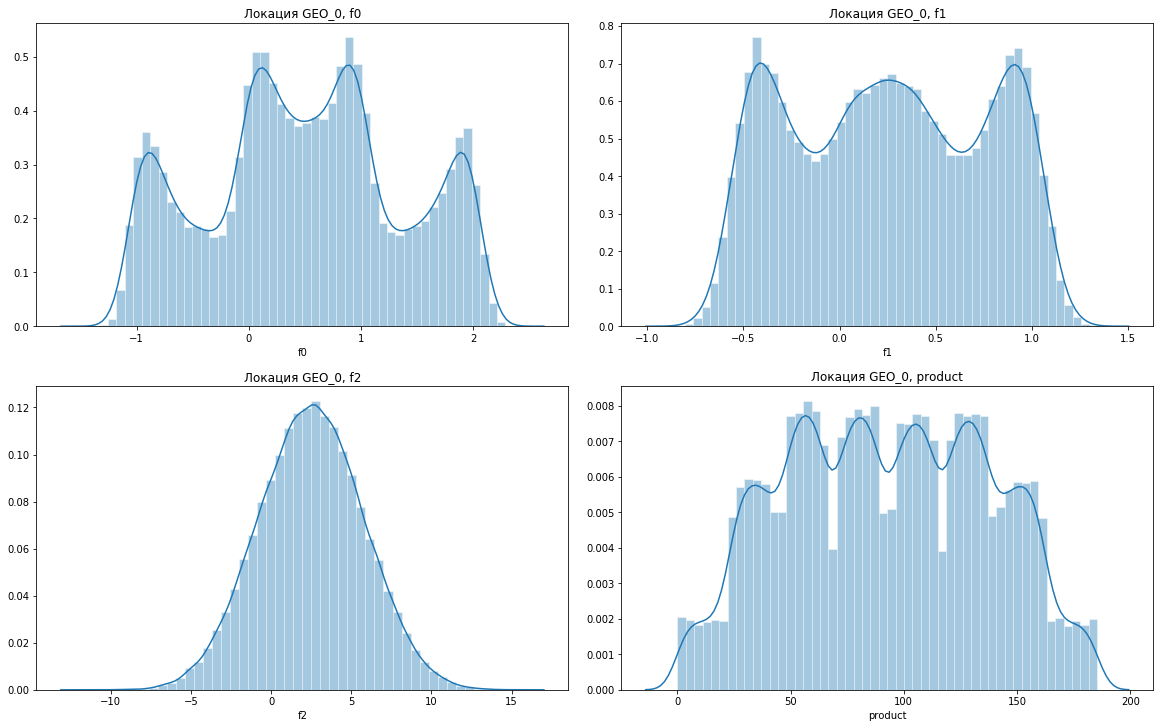

In [22]:
hists_plot(geo_data_0, plot_title='Локация GEO_0, ')

Сложно оценить "правильность" данных не понимая их физического смысла, поэтому, в данном случае, магия признаков f0 ... f2 открыта только *губкинцам*.  
Мы можем лишь сказать, что нормальное рспределение из всех имеет признак f0, остальные признаки (в том числе и целевой) мультимодальны. По большому счёту необходимое условие применения множественной линейной регрессии об обязательной нормальности всех признаков не выполняется. Однако, поскольку мы будем проводить сравнительный анализ моделей локаций, будем использовать модель линейной регрессии, как наиболее простую и производительную.

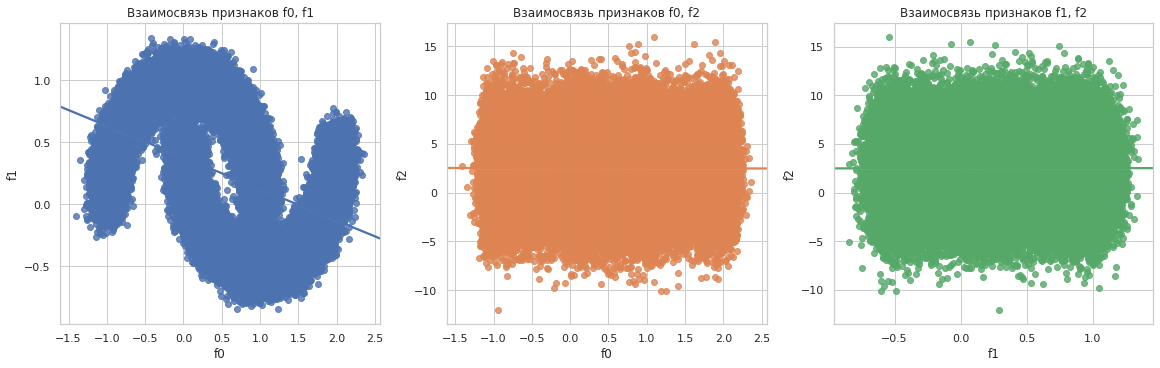

In [23]:
regplots_f(geo_data_0)

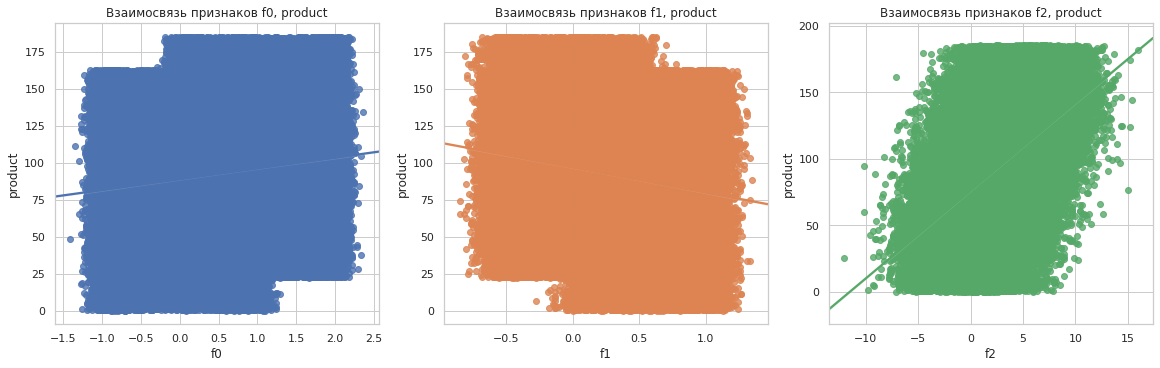

In [24]:
regplots_t(geo_data_0)

In [25]:
geo_data_0.corr()

,f0,f1,f2,product
f0,1.00,-0.44,-0.00,0.14
f1,-0.44,1.00,0.00,-0.19
f2,-0.00,0.00,1.00,0.48
product,0.14,-0.19,0.48,1.00


Признаки f0-f1 имеют ярко выраженную обратную взаимосвязь. Для будущего обучения модели это есть печальное знание -- наличие коррекляции между независимыми признаками может ухудшить качество модели. Взаимосвязи f0-f2, f1-f2 отсутствуют.  
Целевой признак наиболее сильно связан с признаком f2.

### 2.2.2 Локация *geo_1*

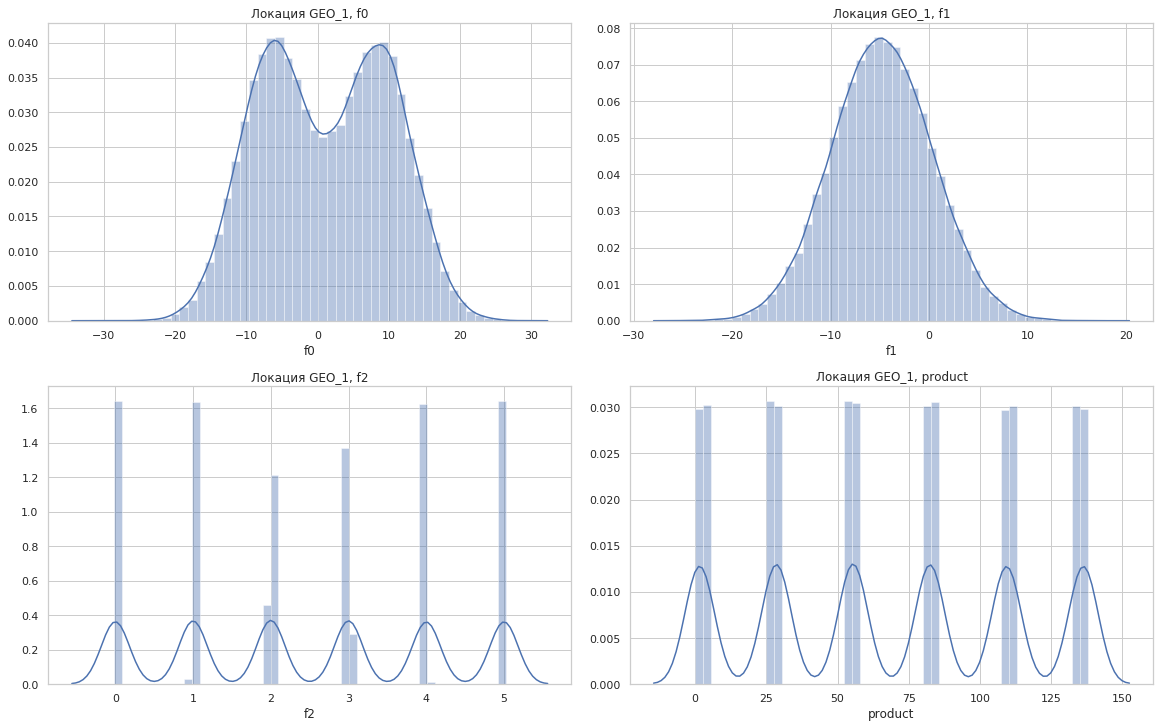

In [26]:
hists_plot(geo_data_1, plot_title='Локация GEO_1, ')

Как и в предыдущей, в данной локации нормальное распределение имеет только один признак. Отсуствие нормальности уже просто норма какая-то

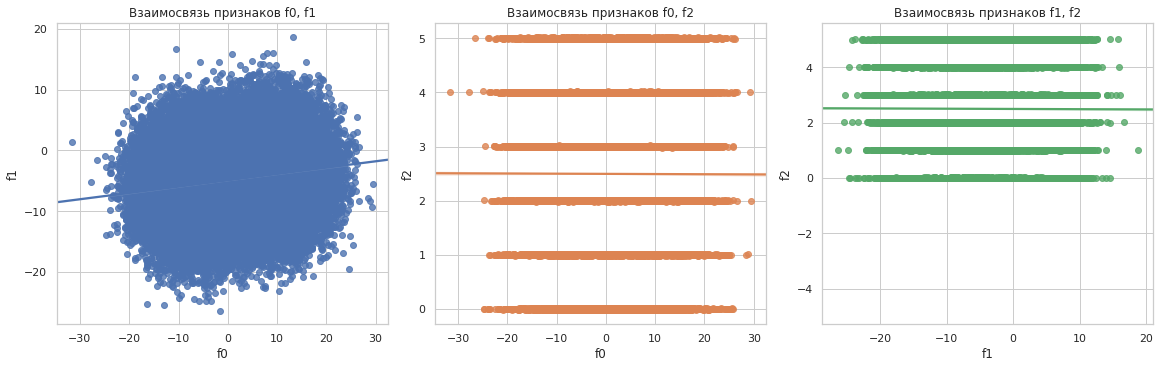

In [27]:
regplots_f(geo_data_1)

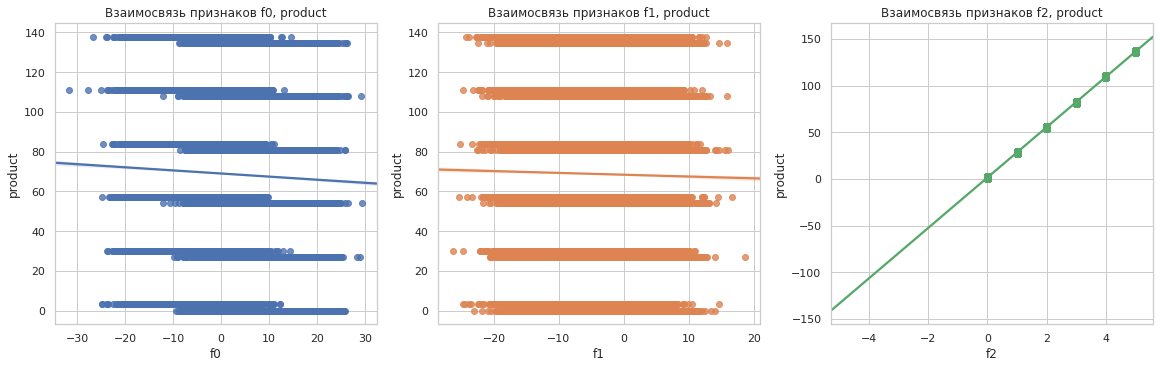

In [28]:
regplots_t(geo_data_1)

In [29]:
geo_data_1.corr()

,f0,f1,f2,product
f0,1.00,0.18,-0.00,-0.03
f1,0.18,1.00,-0.00,-0.01
f2,-0.00,-0.00,1.00,1.00
product,-0.03,-0.01,1.00,1.00


Корреляция признаков на сей раз радует -- взаимная связь f0-f1 значительно меньше, а связь f2-product (независимый признак - целевой признак) так и вовсе равна единице

### 2.2.3 Локация *geo_2*

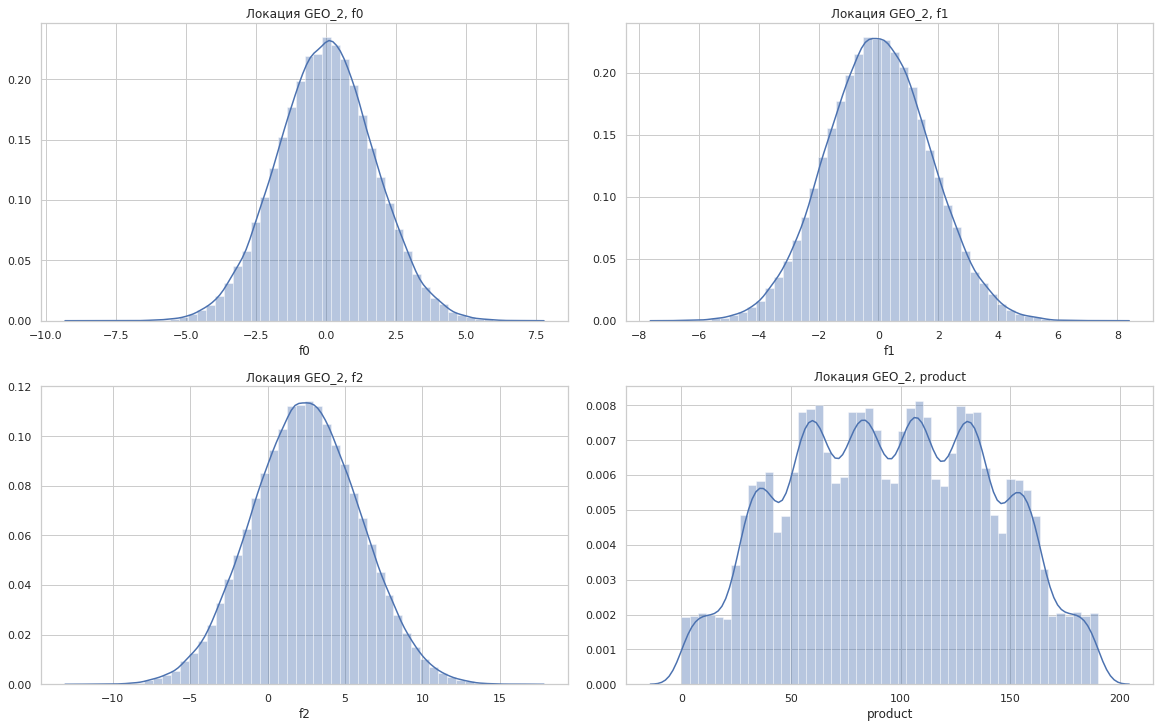

In [30]:
hists_plot(geo_data_2, plot_title='Локация GEO_2, ')

Практически идеальная картина -- все независмые признаки распределены нормально. Немного целевой признак по распределению подкачал, но его не надо судить строго -- приходиться от всех зависеть (что, кстати говоря, мы сейчас и проверим)

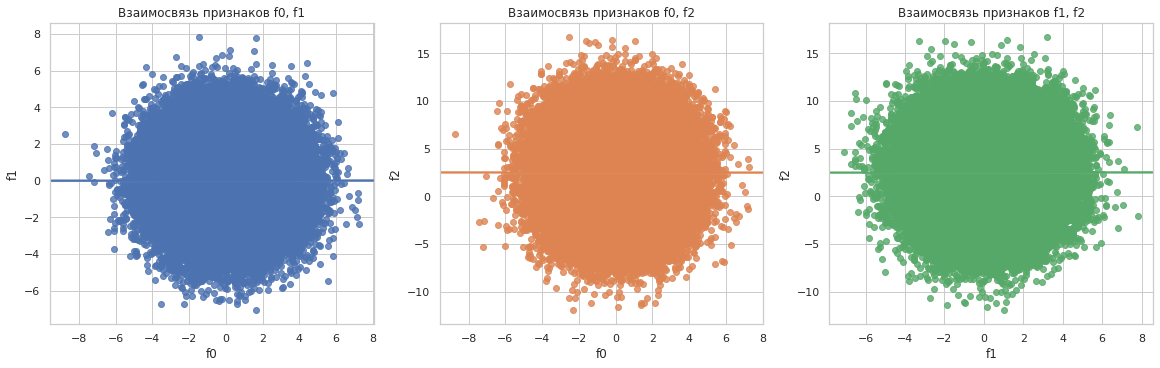

In [31]:
regplots_f(geo_data_2)

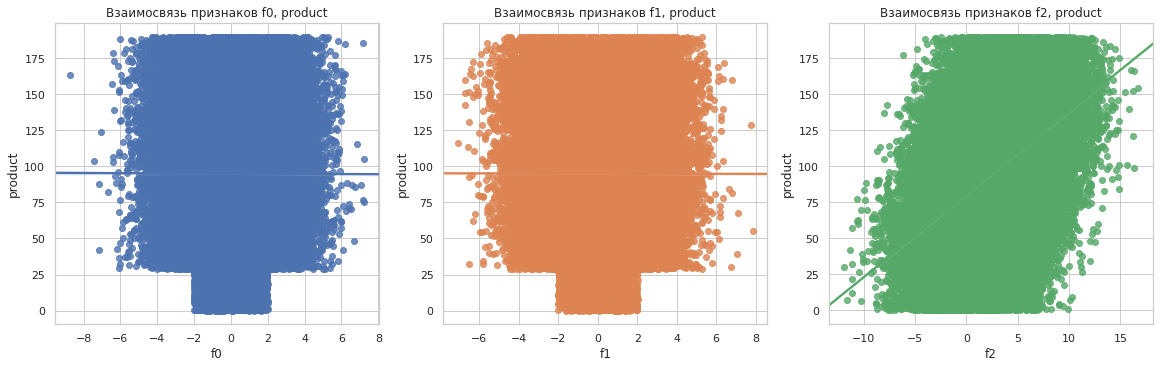

In [32]:
regplots_t(geo_data_2)

In [33]:
geo_data_2.corr()

,f0,f1,f2,product
f0,1.00,0.00,-0.00,-0.00
f1,0.00,1.00,0.00,-0.00
f2,-0.00,0.00,1.00,0.45
product,-0.00,-0.00,0.45,1.00


Лучше картину и придумать сложно -- все предикторы (независимые признаки) взаимонезависимы, а целевой признак зависит только от одного предиктора, т.е., по сути, вся модель машинного обучения вырождается в уравнение прямой.  
Не знаю, как там для нефтянников, а для Data Scientist-ов данное месторождение -- лучшее

***Промежуточный итог***  
  
Анализ переданных данных показал, что признаки имеют сложное мультимодальное распределение, при этом по паре признаков в первой и второй локациях обладают взаимсосвязью. При этом во всех локациях наблюдается наиболее сильная связь целевого признака с признаком *f2*

## 2.3 Обучение и проверка моделей для каждого региона

### 2.3.1 Локация *geo_0*

In [34]:
model_create(geo_data_0, loc=0)

RMSE модели: 37.64 (20.31% от диапазона тестового целевого признака), средний предсказанный запас нефти: 92.60


### 2.3.2 Локация *geo_1*

In [35]:
model_create(geo_data_1, loc=1)

RMSE модели: 0.89 (0.65% от диапазона тестового целевого признака), средний предсказанный запас нефти: 69.11


### 2.3.3 Локация *geo_2*

In [36]:
model_create(geo_data_2, loc=2)

RMSE модели: 40.16 (21.14% от диапазона тестового целевого признака), средний предсказанный запас нефти: 94.86


***Промежуточный итог***  
  
RMSE показывает насколько в среднем отличаются значения целевого признака от значений, предсказанных моделью, т.е. качество модели растёт при уменшении RMSE. Модели первой и третьей локации имеют высокие значения RMSE, при этом вселяющая надежды третья локация в данном случае не порадовала, что доказывает необходимость нормального распределения признаков для модели логической регрессии. Вторая локация имеет отличное значение RMSE, что обусловлено, вероятнее всего, высокой корреляцией целевого признака с признаком f2

## 2.4 Расчёт прибыли

In [37]:
borehole_count = 200
budget = 10000000000
unit_profit = 450000
loss_level = 0.025

In [38]:
BEP = budget / borehole_count / unit_profit # тыс.баррелей
BEP

111.11111111111111

Точкой безубыточности скважины для заданных локаций является запас в 111.2 тыс.баррелей.  
  
Посмотрим прогноз моделей по запасам нефти.

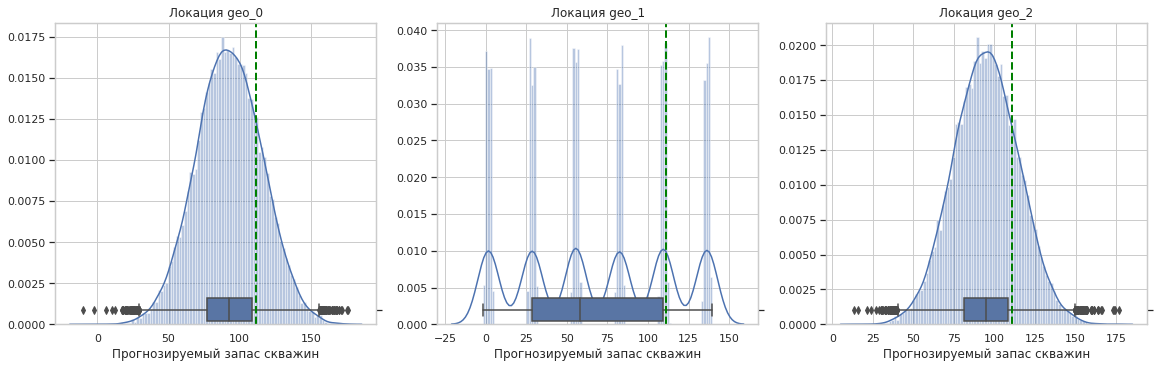

In [39]:
bep_hists([models[0]['predict'], models[1]['predict'], models[2]['predict']], BEP)

Все модели смотрят на месторождения пессиместично -- линия безубыточности (зелёная линия) находится справа от межквартильного размаха. Это не означает, что добыча будет убыточной, но подобные картины навеивают грусть.

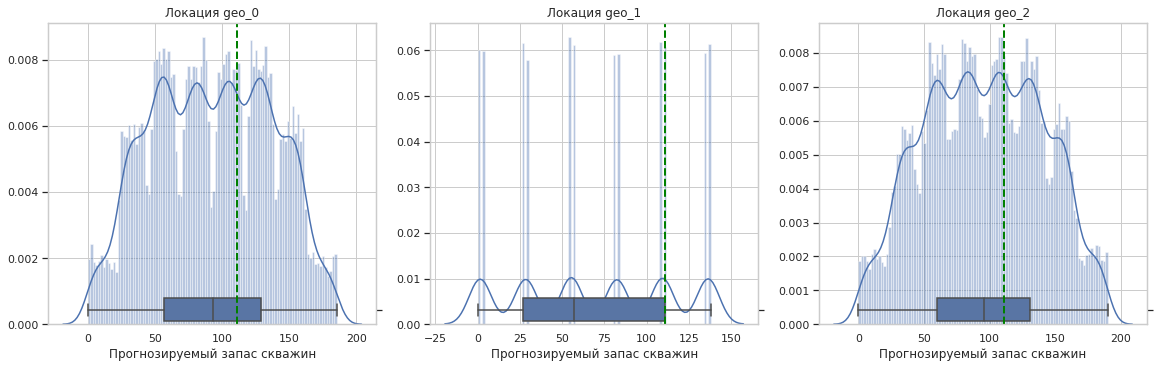

In [40]:
bep_hists([fts[0]['t_test'], fts[1]['t_test'], fts[2]['t_test']], BEP)

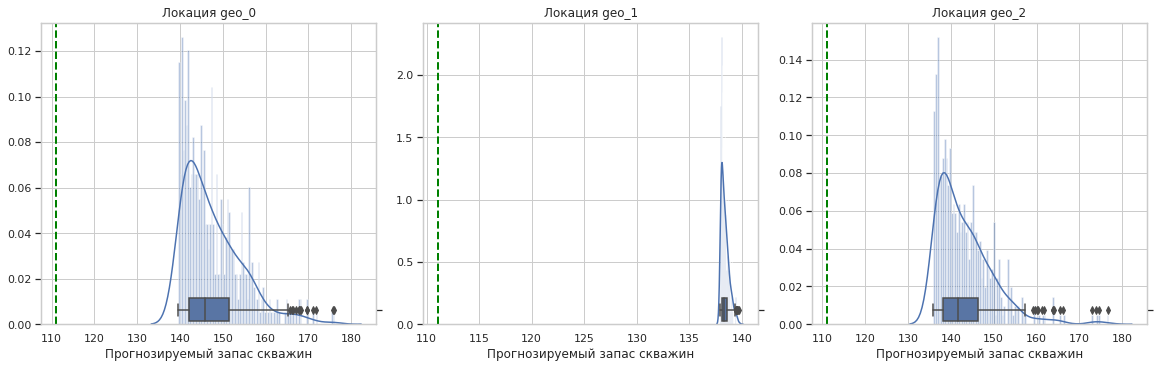

In [41]:
bep_hists([sorted(models[0]['predict'].tolist())[-500:], 
           sorted(models[1]['predict'].tolist())[-500:], 
           sorted(models[2]['predict'].tolist())[-500:]], BEP)

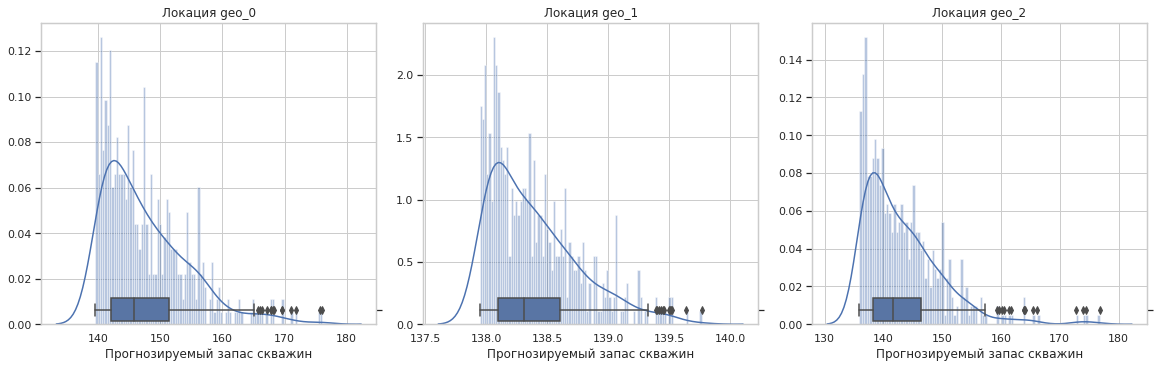

In [42]:
bep_hists([sorted(models[0]['predict'].tolist())[-500:],
           sorted(models[1]['predict'].tolist())[-500:],
           sorted(models[2]['predict'].tolist())[-500:]], False)

Радостная картина -- линии безубыточности всех месторождений находится далеко слева, т.е. 500 скважин каждой локации весьма прибыльны. Что ж, на текущем этапе можно снять сливки с месторождений, а о разработке остальных скважин подумать позже, когда наиболее прибыльные будут выработаны.  
  
Однако далее нам необходимо проверить эффективность полученных моделей при расчёте возможной прибыли и рисков убытков.

***Промежуточный итог***  
  
На текущем этапе была рассчитана точка безубыточности скважины для заданных локаций, которая равна 111.2 тыс.баррелей.

## 2.4 Расчёт рисков для каждого региона

На предыдущем этапе мы видели, что модели в своих оценках заметно расходятся с реальными данными о запасах нефти. Проверим модели методом *bootstrap*, расчитывая значения прибили двухсот наиболее ёмких скважин, предсказанных моделями. При этом объем запасов выбранных скважин будем брать из исходных данных. Также, при расчёте прибыли, мы сможем определить процент случаев с отрицательной прибылью, который покажет вероятность (риск) убытков на той или иной локации.

### 2.4.1 Локация *geo_0*

In [43]:
model_bootstrap(0, budget, unit_profit)

Средняя прибыль 445 599 577.49
95% доверительный интервал среднего значения прибыли (429389044.9870601, 461810109.9830324)
Риск убытков 4.40%


### 2.4.2 Локация *geo_1*

In [44]:
model_bootstrap(1, budget, unit_profit)

Средняя прибыль 481 415 795.73
95% доверительный интервал среднего значения прибыли (469270915.92414147, 493560675.53604823)
Риск убытков 1.10%


### 2.4.3 Локация *geo_2*

In [45]:
model_bootstrap(2, budget, unit_profit)

Средняя прибыль 427 607 550.56
95% доверительный интервал среднего значения прибыли (411634127.9727136, 443580973.15015113)
Риск убытков 4.70%


***Промежуточный итог***  

Результаты красноречивые -- все локации прибыльны, но в первой и в третьей высок риск убытков. Предпочтительным является месторождение второй локации

# 3 Вывод

В ходе выполнения работы было сделано следующее.  
  
На этапе предобработки данных в таблицах *geo_data_0*, *geo_data_1* и *geo_data_2* удалён столбец **id**.  
Пропуски и аномальные значения в таблицах отсутствовали.  
  
Затем был произведён анализ переданных данных, который показал, что признаки имеют сложное мультимодальное распределение, при этом по паре признаков в первой и второй локациях обладают взаимсосвязью. При этом во всех локациях наблюдается наиболее сильная связь целевого признака с признаком *f2*.  
  
Затем были созданы и обучены модели машинного обучения для каждой локации. По полученным предикторным значениям моделей были рассчитаны зачения RMSE, которые показывают насколько в среднем отличаются значения целевого признака от значений, предсказанных моделью, т.е. качество модели растёт при уменшении RMSE. Модели первой и третьей локации имеют высокие значения RMSE, при этом вселяющая надежды третья локация в данном случае не порадовала, что доказывает необходимость нормального распределения признаков для модели логической регрессии. Вторая локация имеет отличное значение RMSE, что обусловлено, вероятнее всего, высокой корреляцией целевого признака с признаком f2.  
  
Далее была рассчитана точка безубыточности скважины для заданных локаций, которая оказалась равной 111.2 тыс.баррелей.  
  
Анализ рассчитанных запасов скважин показал, что все модели смотрят на месторождения пессиместично -- линия безубыточности находится справа от межквартильного размаха распределения величн запасов. Однако это не означает, что добыча будет убыточной.  
При этом реальные данные выглядят более оптимистично -- линии безубыточности первой и третьей локаций попали в межквартильный размах, т.е. подобралась близко к среднему значению запасов нефти.  
  
Далее была проведена проверка моделей методом *bootstrap*, путём рассчёта значения прибили двухсот наиболее ёмких скважин, предсказанных моделями. При этом объём запасов выбранных скважин брался из исходных данных. Также, при расчёте прибыли, мы смогли определить процент случаев с отрицательной прибылью, который показал вероятность (риск) убытков на той или иной локации. 
  
Результаты проверки получились красноречивые -- все локации прибыльны, но в первой и в третьей высок риск убытков. 
  
***Таким образом, для бурения очередных скважин предпочтительным является месторождение второй локации -- GEO_1***